In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [57]:
from scipy.stats import randint

In [108]:
from sklearn.datasets import load_breast_cancer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score

## EDA

In [3]:
breast_cancer = load_breast_cancer()

In [4]:
type(breast_cancer)

sklearn.utils.Bunch

In [5]:
breast_cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [6]:
breast_cancer.data.shape

(569, 30)

In [7]:
breast_cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [8]:
# breast_cancer.target

In [9]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
# breast_cancer.DESCR

In [12]:
X = breast_cancer.data
y = breast_cancer.target

## KNN classification model

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
knn = KNeighborsClassifier(n_neighbors=6)

In [15]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [16]:
y_pred = knn.predict(X_test)

In [17]:
print(knn.score(X_test, y_test), '\n')
print(confusion_matrix(y_test, y_pred), '\n')
print(classification_report(y_test, y_pred))

0.9649122807017544 

[[40  3]
 [ 1 70]] 

             precision    recall  f1-score   support

          0       0.98      0.93      0.95        43
          1       0.96      0.99      0.97        71

avg / total       0.97      0.96      0.96       114



## LogisticRegression model

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
log_reg = LogisticRegression()

In [20]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
y_pred = log_reg.predict(X_test)

In [22]:
print(log_reg.score(X_test, y_test), '\n')
print(confusion_matrix(y_test, y_pred), '\n')
print(classification_report(y_test, y_pred))

0.956140350877193 

[[39  4]
 [ 1 70]] 

             precision    recall  f1-score   support

          0       0.97      0.91      0.94        43
          1       0.95      0.99      0.97        71

avg / total       0.96      0.96      0.96       114



## Plotting an ROC curve

In [33]:
# compute predicted probabilities using .predict_proba()
y_pred_proba = log_reg.predict_proba(X_test)[:,1]

In [34]:
# generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

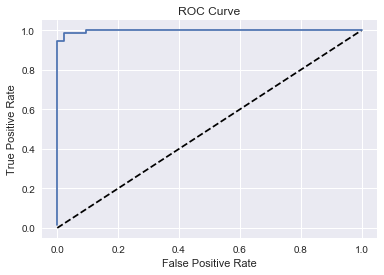

In [35]:
# plot ROC curve
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## Plotting Precision-Recall Curve

In [37]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)

In [40]:
precision, recall, _

(array([0.62280702, 0.94594595, 1.        ]),
 array([1.        , 0.98591549, 0.        ]),
 array([0, 1]))

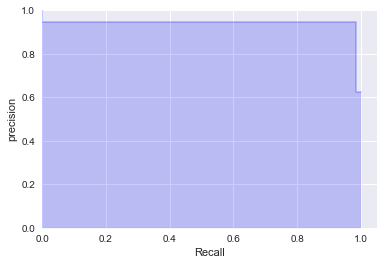

In [38]:
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', color='b', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('precision')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.0])
plt.show()

## AUC (Area Under ROC Curve)

In [42]:
# compute predicted probabilities using .predict_proba()
y_pred_proba = log_reg.predict_proba(X_test)[:,1]

In [43]:
# compute and print AUC score
print('AUC: {}'.format(roc_auc_score(y_test, y_pred_proba)))

AUC: 0.9977071732721914


In [44]:
# compute cross_validated AUC scores
cv_auc = cross_val_score(log_reg, X, y, cv=5, scoring='roc_auc')

In [45]:
# print list of AUC scores
print('AUC scores using 5-fold cross validation: {}'.format(cv_auc))

AUC scores using 5-fold cross validation: [0.99450904 0.99192506 0.99664655 0.98222669 0.99664655]


## Hyperparameter tuning with GridSearchCV
Like Lasso and Ridge that have alpha as their parameters, **LogisticRegression** also has **C** parameter which controls the **inverse regularization strength**. Large C leads to an **overfit** model and small C to **underfit** one!

In [52]:
# set the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C':c_space}

In [53]:
log_reg = LogisticRegression()

In [54]:
# instantiate the GridSearchCV object
log_reg_cv = GridSearchCV(log_reg, param_grid, cv=5)

In [55]:
log_reg_cv.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-05, 8.48343e-05, 7.19686e-04, 6.10540e-03, 5.17947e-02,
       4.39397e-01, 3.72759e+00, 3.16228e+01, 2.68270e+02, 2.27585e+03,
       1.93070e+04, 1.63789e+05, 1.38950e+06, 1.17877e+07, 1.00000e+08])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [56]:
# print the tuned parameters and scores
print('Tuned LogisticRegression parameters: {}'.format(log_reg_cv.best_params_))
print('Best score: {}'.format(log_reg_cv.best_score_))

Tuned LogisticRegression parameters: {'C': 19306.977288832535}
Best score: 0.9595782073813708


## Hyperparameter tuning with RandomizedSearchCV
When we work on **large hyperparameter space** and **multiple hyperparameters** its worth to use **RandomizedSearchCV** instead of **GridSearchCV**. 

In [91]:
# setup the parameters
param_dist = {'max_depth' : [3, None],
              'max_features' : randint(1,9),
              'min_samples_leaf' : randint(1,9),
              'criterion' : ['gini','entropy']}

In [92]:
# instantiate the decision tree classifier
tree = DecisionTreeClassifier()

In [93]:
# instantiate the RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

In [94]:
tree_cv.fit(X, y)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_depth': [3, None], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0AF60670>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0AF603F0>, 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [96]:
print('Tuned DecisionTreeClassifier parameters: {}'.format(tree_cv.best_params_))
print('Best score: {}'.format(tree_cv.best_score_))

Tuned DecisionTreeClassifier parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 2}
Best score: 0.9472759226713533


## Hold-Out set classification with LogisticRegression
Tune the **C** and **Penalty** hyperparamaters using **GridSearchCV** on the training data

In [97]:
c_space = np.logspace(-5,8,15)
param_grid = {'C':c_space, 'penalty':['l1','l2']}

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
log_reg = LogisticRegression()

In [103]:
log_reg_cv = GridSearchCV(log_reg, param_grid, cv=5)

In [104]:
log_reg_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-05, 8.48343e-05, 7.19686e-04, 6.10540e-03, 5.17947e-02,
       4.39397e-01, 3.72759e+00, 3.16228e+01, 2.68270e+02, 2.27585e+03,
       1.93070e+04, 1.63789e+05, 1.38950e+06, 1.17877e+07, 1.00000e+08]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [105]:
print('Tuned LogisticRegression Parameters: {}'.format(log_reg_cv.best_params_))
print('Tuned LogisticRegression Accuracy: {}'.format(log_reg_cv.best_score_))

Tuned LogisticRegression Parameters: {'C': 163789.3706954068, 'penalty': 'l2'}
Tuned LogisticRegression Accuracy: 0.9648351648351648
